In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.transforms
import seaborn as sns
import math
from math import sqrt, factorial
import re
from itertools import groupby
from operator import itemgetter
import multiprocessing
from CustomFunctions import PCvisualization
from CustomFunctions.DetailedBalance import get_transition_counts, interpolate_2dtrajectory
import itertools
from matplotlib.patches import Ellipse, Rectangle
from CustomFunctions.DetailedBalance import contour_coords


In [34]:
####### load common directories and data
time_interval = 10 #sec/frame
basedir = 'E:/Aaron/Combined_37C_Confocal_PCA_smooth/'
datadir = basedir + 'Data_and_Figs/'
FullFrame = pd.read_csv(datadir + 'Shape_Metrics_transitionPCbins.csv', index_col=0)
centers = pd.read_csv(datadir+'PC_bin_centers.csv', index_col=0)
nbins = np.max(FullFrame[[x for x in FullFrame.columns.to_list() if 'bin' in x]].to_numpy())

In [4]:
### restrict data to RANDOM
treatments = ['Random']

savedir = basedir + 'random/'
if not os.path.exists(savedir):
    os.makedirs(savedir)

#restrict dataframe to only random experiments
TotalFrame = FullFrame[FullFrame.Treatment=='Random'].copy()

In [35]:
### restrict data to PARANITROBLEBBISTATIN
treatments = ['DMSO','Para-Nitro-Blebbistatin']

savedir = basedir + 'Para-Nitro-Blebbistatin/'
if not os.path.exists(savedir):
    os.makedirs(savedir)

#limit data to the Para-Nitro-Blebbistatin experiments
TotalFrame = FullFrame[FullFrame.Experiment == 'Drug'].copy()
dates = [20240624,20240626,20240701,20241125,20241126,20241127]
TotalFrame = TotalFrame[TotalFrame.Date.isin(dates)]
TotalFrame['Treatment'] = pd.Categorical(TotalFrame.Treatment.to_list(), categories=treatments, ordered=True)

In [37]:
### restrict data to CK666
treatments = ['DMSO','CK666']

savedir = basedir + 'CK666/'
if not os.path.exists(savedir):
    os.makedirs(savedir)

#limit data to the CK666 experiments
TotalFrame = FullFrame[FullFrame.Experiment == 'Drug'].copy()
dates = [20240610,20240617,20240620,20241205,20241209]
TotalFrame = TotalFrame[TotalFrame.Date.isin(dates)]
TotalFrame['Treatment'] = pd.Categorical(TotalFrame.Treatment.to_list(), categories=treatments, ordered=True)

remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
Opened PC9-PC10 transition rate files
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
Opened PC8-PC10 transition rate files
Opened PC8-PC9 transition rate files
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
Opened PC7-PC10 transition rate files
Opened PC7-PC9 transition rate files
Opened PC7-PC8 transition rate files
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
remove this plot
Opened PC6-PC10 transition rate files
Opened PC6-PC9 transition rate files
Opened PC6-PC8 transition rate files
Opened PC6-PC7 transition rate files
remove this plot
remove this plot
remove this pl

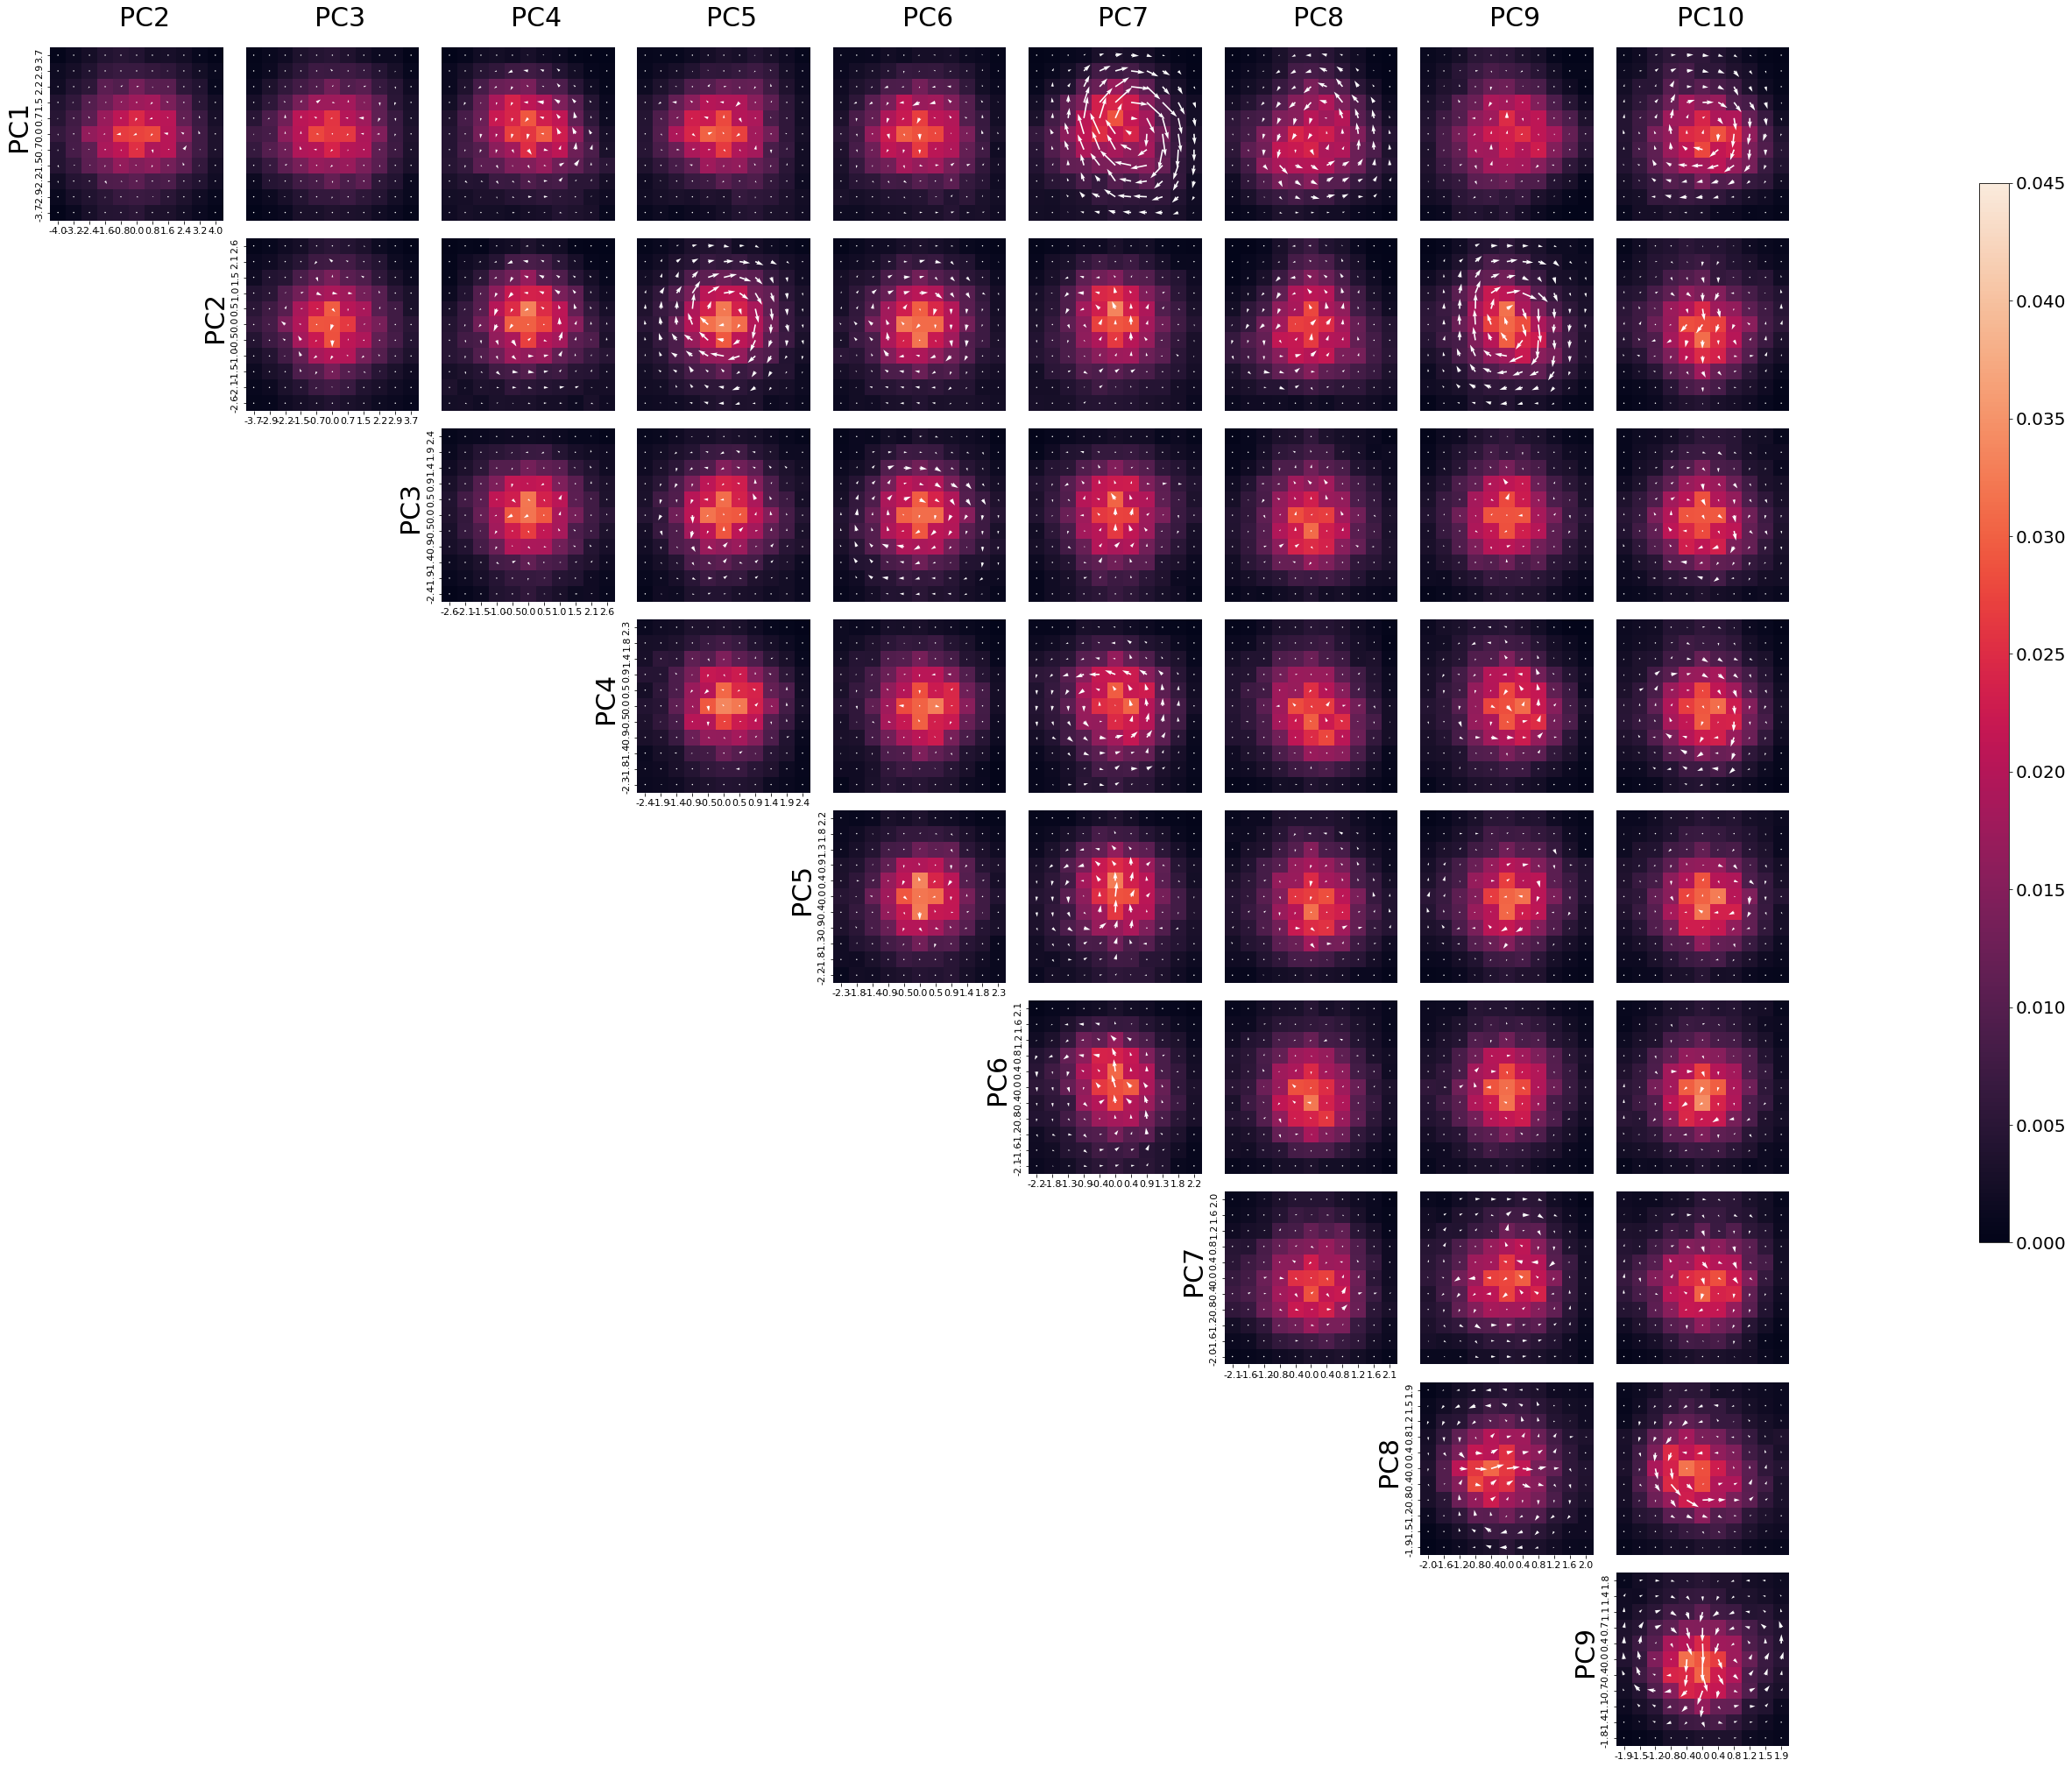

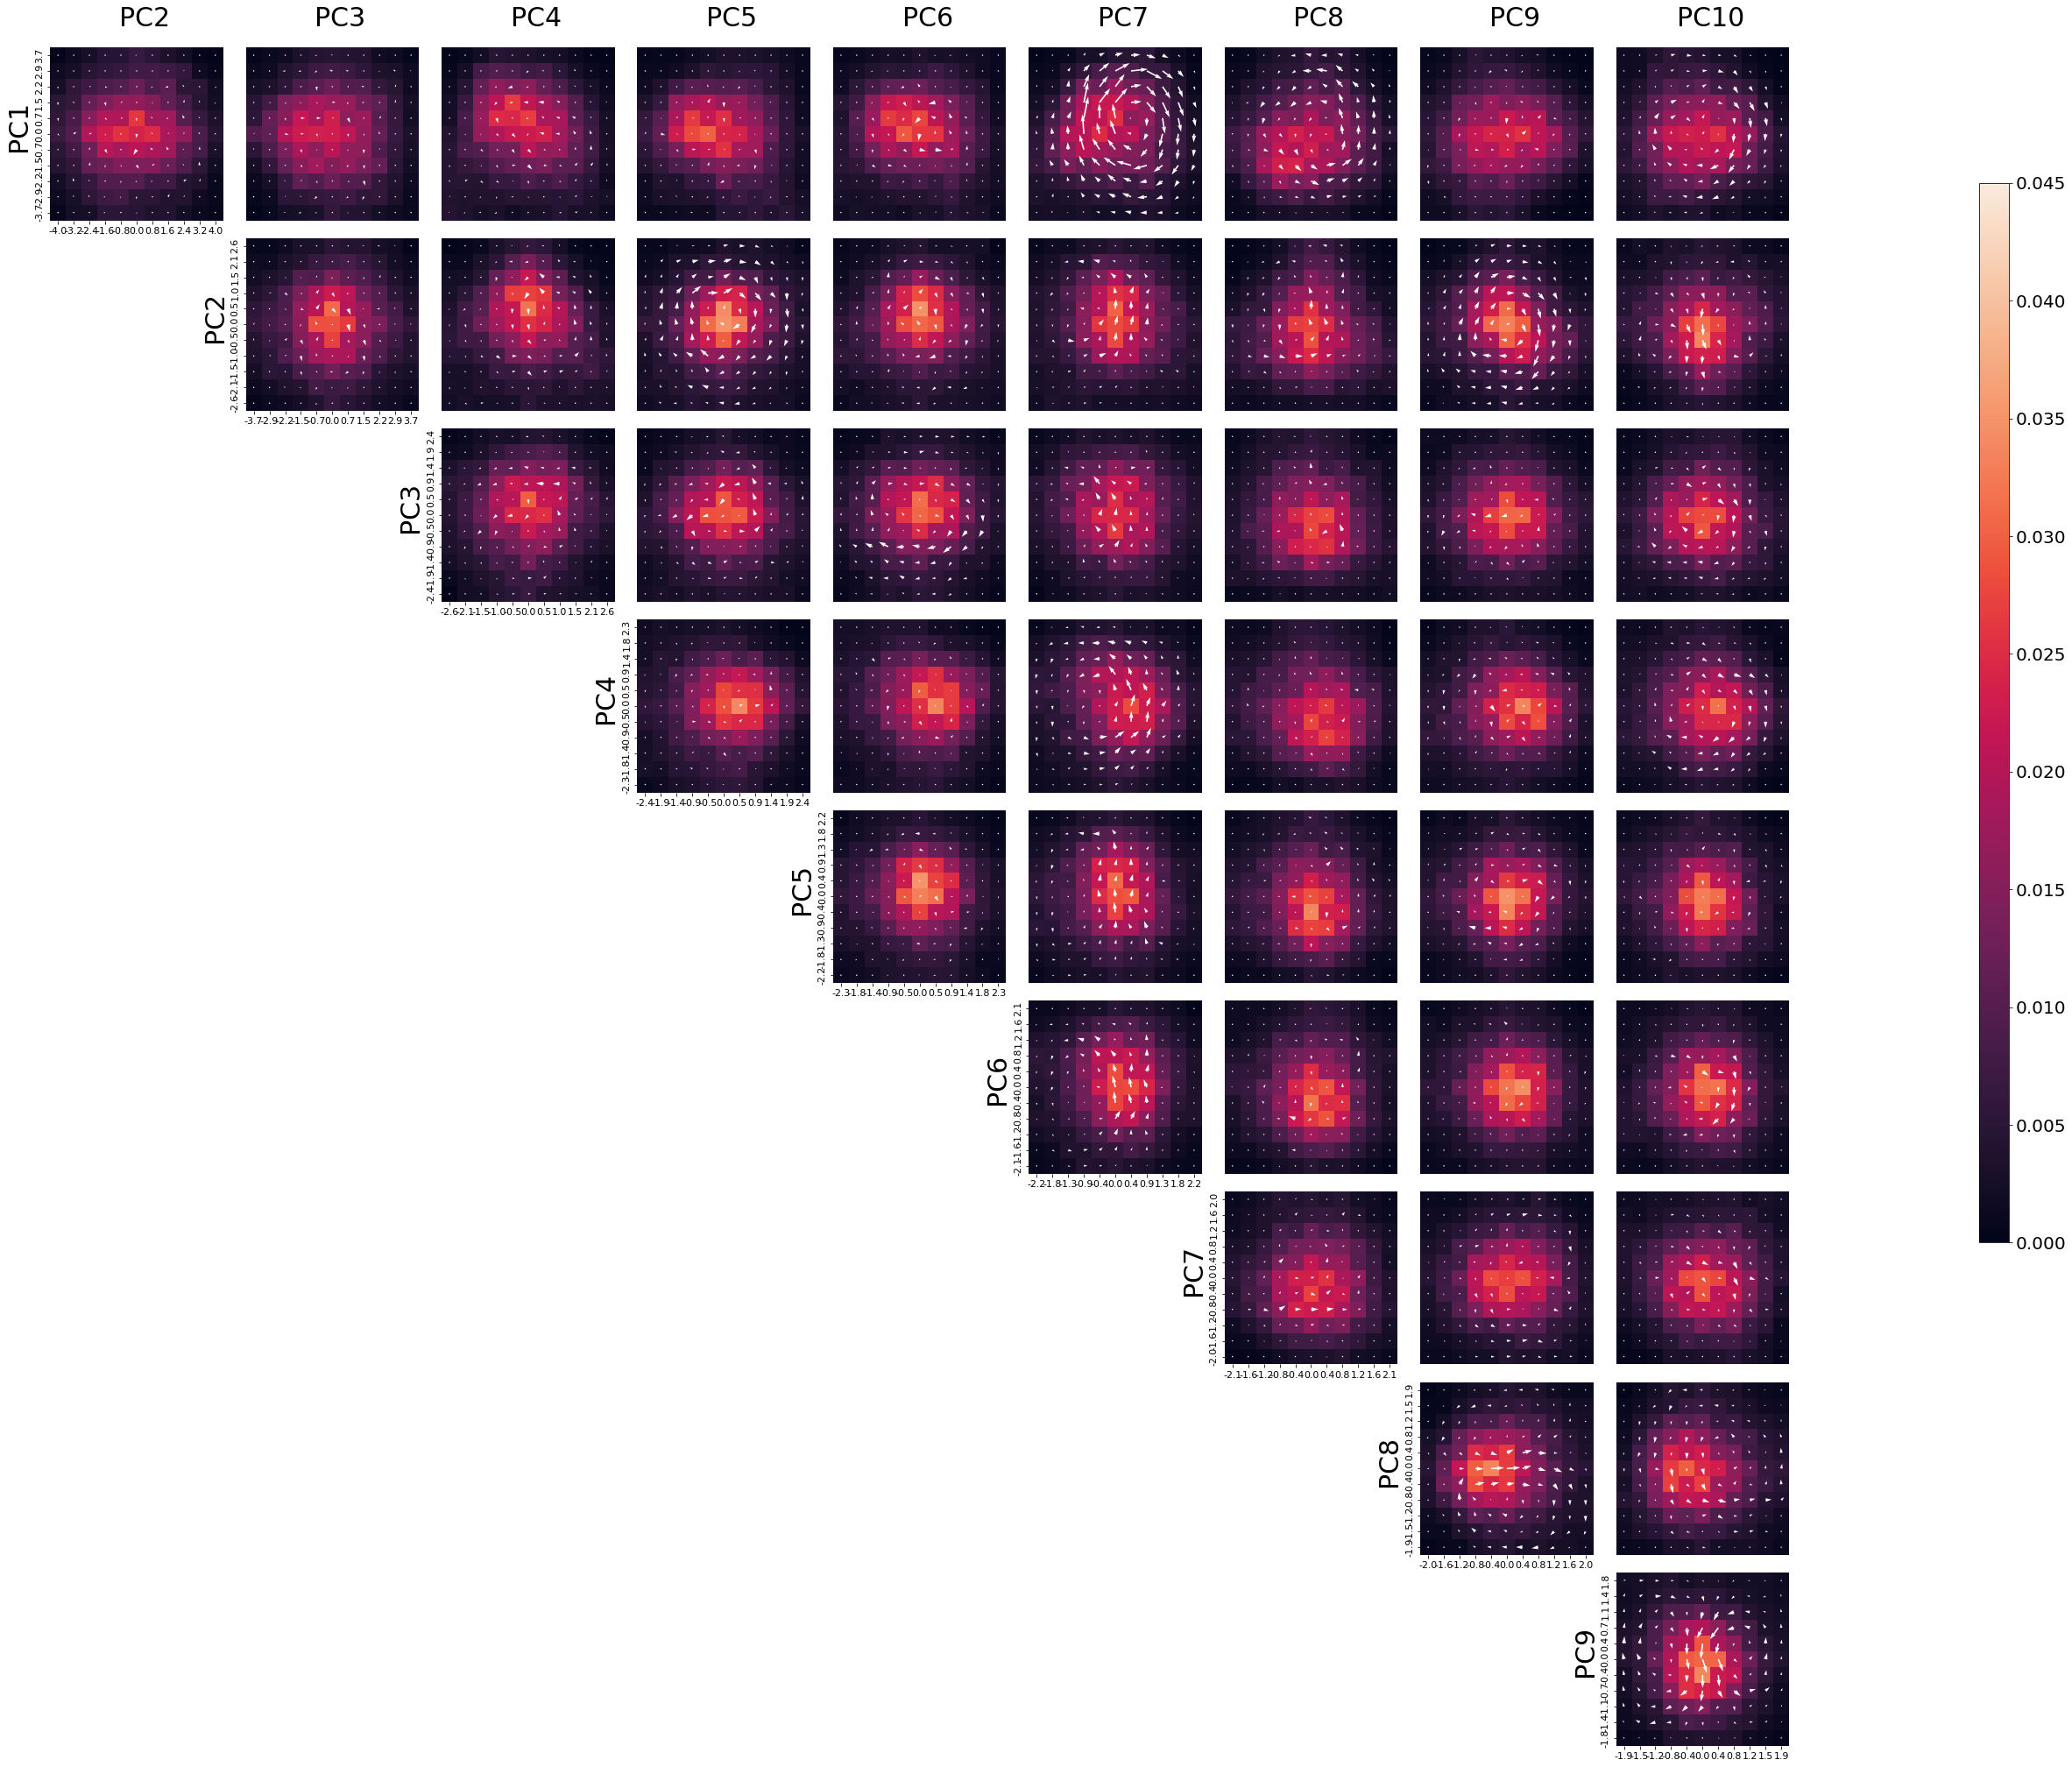

In [38]:
########### ONE BIG DIAGONAL GRAPH OF ALL PC CGPS's ##############
# inverse scale for arrows
scale = 0.0005
binlist = [i for i in TotalFrame.columns.to_list() if 'bin' in i]

for m in TotalFrame.Treatment.unique():    
    fig, axes = plt.subplots(len(binlist),len(binlist), figsize = (40,40))

    #single colorbar axis
    cbar_ax = fig.add_axes([.968, .4, .012, .42])
    for xrow, a in enumerate(binlist[::-1]):
        for ycol, b in enumerate(binlist[::-1]):
            bin1 = a.split('bin')[0]
            bin2 = b.split('bin')[0]

            ax = axes[int(bin1.split('PC')[-1])-1,int(bin2.split('PC')[-1])-1]

            if os.path.exists(savedir+ 'allCGPS/' +f'{bin1}-{bin2}_binned_transition_rates_separated.csv'):
                transdf_sep = pd.read_csv(savedir+ 'allCGPS/' +f'interpolated_{bin1}-{bin2}_transitions_separated.csv', index_col=0)
                trans_rate_df_sep = pd.read_csv(savedir+ 'allCGPS/' +f'{bin1}-{bin2}_binned_transition_rates_separated.csv', index_col=0)
                print(f'Opened {bin1}-{bin2} transition rate files')
                
                #get only the treatment type currently being handled
                transdf_sep = transdf_sep[transdf_sep.Treatment == m]
                trans_rate_df_sep = trans_rate_df_sep[trans_rate_df_sep.Treatment == m]
                
                ########### PDFs AND PROBABILITY FLUX OF THE SEPARATED MIGRATION MODES #############

                ################ heatmap of probability density #############
                ttot = transdf_sep.time_elapsed.sum()
                #make numpy array with heatmap data
                bighm = np.zeros((nbins,nbins))
                #get total time observed in the system

                for x in range(nbins):
                    for y in range(nbins):
                        current =  transdf_sep[(transdf_sep['from_x'] == x+1) & (transdf_sep['from_y'] == y+1)]
                        if current.empty:
                            bighm[y,x] = 0
                        else:
                            bighm[y,x] = current.time_elapsed.sum()/ttot
                #plot heatmap with seaborn
                sns.heatmap(
                    bighm,
                    vmin=0, vmax=0.045, #center=0,
                    cmap='rocket',
                    square=True,
                    xticklabels = True,
                    yticklabels = True,
                    ax = ax,
                    cbar=False,
#                     cbar_ax = None if i else cbar_ax,
            #         cbar_kws=cbar_kws
                )

                ######################### vector map of probability flux ################
                for x in range(1,nbins+1):
                    for y in range(1,nbins+1):
                        current = trans_rate_df_sep[(trans_rate_df_sep['x'] == x) & (trans_rate_df_sep['y'] == y)]
                        xcurrent = (current.x_plus_rate - current.x_minus_rate)/2
                        ycurrent = (current.y_plus_rate - current.y_minus_rate)/2
                        ax.quiver(x-0.5,
                                   y-0.5, 
                                   xcurrent,
                                   ycurrent,
                                  angles = 'xy',
                                  scale_units = 'xy',
                                  scale = scale,
            #                       width = 0.012,
            #                       minlength = 0.8,
                                  color = 'white')


                # axis label stuff

                #set limits
                ax.set_xlim(0,nbins+1)
                ax.set_ylim(0,nbins+1)



                if a == binlist[0]:
                    ax.set_title(bin2, fontsize = 30)
                if ycol == xrow-1:
                    ax.set_ylabel(bin1, fontsize = 30)
                
                    ax.set_xticks(np.arange(0.5,nbins+0.5),[round(x,1) for x in centers[bin1].to_list()])
                    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 11)
                    ax.set_yticks(np.arange(0.5,nbins+0.5),[round(x,1) for x in centers[bin2].to_list()])
                    ax.set_yticklabels(ax.get_yticklabels(), fontsize = 11)
                else:
                    ax.set_xticks([])
                    ax.set_xticklabels([])
                    ax.set_yticks([])
                    ax.set_yticklabels([])

            else:
                print('remove this plot')
                ax.remove()



    fig.colorbar(axes[0, 1].collections[0], cax=cbar_ax)
    cbar_ax.tick_params(labelsize=20)
#     plt.tight_layout() 
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.savefig(savedir + f'{m} all cgps flux and pdf diagonal.png', bbox_inches='tight')